# Exploring which mb in the CNV data is most important

Steps:
1. Import the CNV data excel
2. Locate where the NP/P column is
3. Put the data in train,val,test
4. Put through a Random Forest to predict from the CNV if the patient is NP or P
5. Evaluate

Extension
1. Do the same to predict the pathology grading (NDBE, ID...)

# CNV

In [1]:
import pandas
from sklearn.model_selection import train_test_split

path_to_csv = "/mnt/scratchc/fmlab/zuberi01/masters/model_training_input_230815.csv"

# put into a pandas with the first row being column names
df = pandas.read_csv(path_to_csv, header=0)

# only keep the Status column and the columns that have  ":"
df = df.loc[:, df.columns.str.contains(":") | df.columns.str.contains("Status")]

# in the Y column, replace "NP" with 0 and "P" with 1
df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)

# the status column is the Y, the rest are the X
X = df.drop("Status", axis=1)
Y = df["Status"]

# separate into train, val and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

/tmp/ipykernel_36109/4077273135.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)


In [2]:
print(len(X_train), len(X_val), len(X_test))

# print the number of P and NP in Y
print(Y.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

483 121 152
Status
0    420
1    336
Name: count, dtype: int64
Status
0    70
1    51
Name: count, dtype: int64
Status
0    78
1    74
Name: count, dtype: int64


In [6]:
# now train a random forest model and evaluate it

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=41, random_state=0)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)
Y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Train accuracy: {train_accuracy}")
print(f"Val accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# get the AUC as well
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(Y_train, Y_train_pred)
val_auc = roc_auc_score(Y_val, Y_val_pred)
test_auc = roc_auc_score(Y_test, Y_test_pred)

print(f"Train AUC: {train_auc}")
print(f"Val AUC: {val_auc}")
print(f"Test AUC: {test_auc}")

Train accuracy: 0.9979296066252588
Val accuracy: 0.743801652892562
Test accuracy: 0.7960526315789473
Train AUC: 0.9976303317535544
Val AUC: 0.7200280112044818
Test AUC: 0.792966042966043


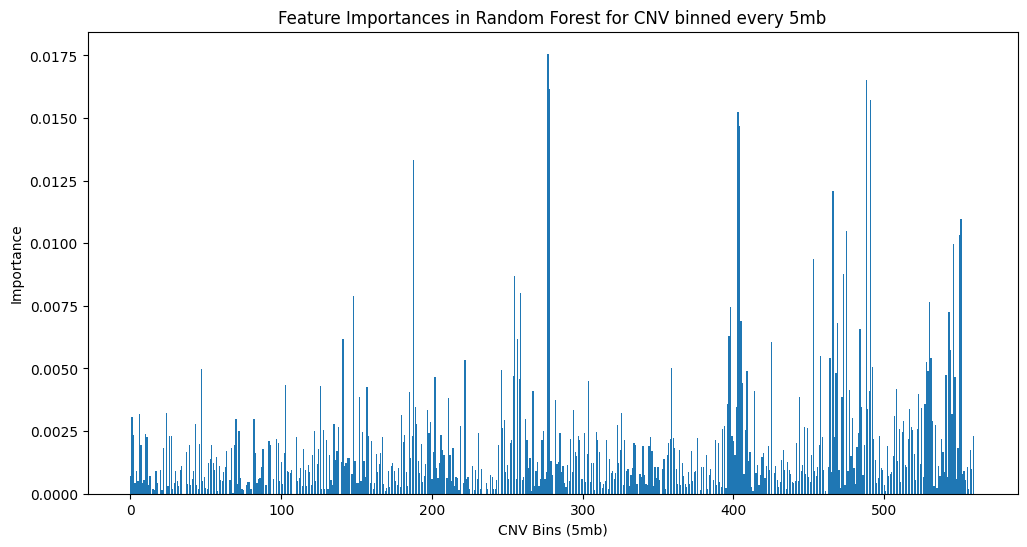

In [4]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('CNV Bins (5mb)')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest for CNV binned every 5mb')
plt.show()

# Only p

In [7]:
import pandas
from sklearn.model_selection import train_test_split

path_to_csv = "/mnt/scratchc/fmlab/zuberi01/masters/model_training_input_230815.csv"

# put into a pandas with the first row being column names
df = pandas.read_csv(path_to_csv, header=0)

# only keep the Status column and the columns that end in "p"
df = df.loc[:, df.columns.str.contains("p") | df.columns.str.contains("Status")]
# remove the columns 'Esophageal location', 'OGD_pathology'
df = df.drop(['Esophageal location', 'OGD_pathology'], axis=1)

# in the Y column, replace "NP" with 0 and "P" with 1
df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)

# the status column is the Y, the rest are the X
X = df.drop("Status", axis=1)
Y = df["Status"]

# separate into train, val and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

/tmp/ipykernel_36109/1216071072.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)


In [8]:
# now train a random forest model and evaluate it

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=41, random_state=0)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)
Y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Train accuracy: {train_accuracy}")
print(f"Val accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# get the AUC as well
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(Y_train, Y_train_pred)
val_auc = roc_auc_score(Y_val, Y_val_pred)
test_auc = roc_auc_score(Y_test, Y_test_pred)

print(f"Train AUC: {train_auc}")
print(f"Val AUC: {val_auc}")
print(f"Test AUC: {test_auc}")

Train accuracy: 0.9979296066252588
Val accuracy: 0.743801652892562
Test accuracy: 0.7960526315789473
Train AUC: 0.9976303317535544
Val AUC: 0.7200280112044818
Test AUC: 0.792966042966043


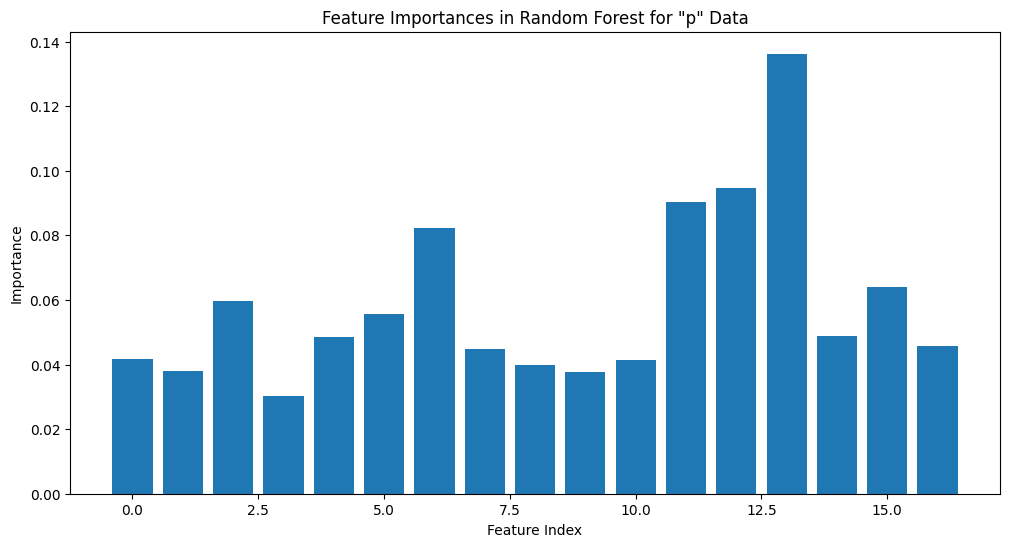

In [9]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest for "p" Data')
plt.show()

# Only q

In [10]:
import pandas
from sklearn.model_selection import train_test_split

path_to_csv = "/mnt/scratchc/fmlab/zuberi01/masters/model_training_input_230815.csv"

# put into a pandas with the first row being column names
df = pandas.read_csv(path_to_csv, header=0)

# only keep the Status column and the columns that end in "q"
df = df.loc[:, df.columns.str.contains("q") | df.columns.str.contains("Status")]
# Remove column "seq_ID"
df = df.drop(['seq_ID'], axis=1)

# in the Y column, replace "NP" with 0 and "P" with 1
df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)

# the status column is the Y, the rest are the X
X = df.drop("Status", axis=1)
Y = df["Status"]

# separate into train, val and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

/tmp/ipykernel_36109/2213108578.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)


In [12]:
# now train a random forest model and evaluate it

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=41, random_state=0)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)
Y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Train accuracy: {train_accuracy}")
print(f"Val accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# get the AUC as well
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(Y_train, Y_train_pred)
val_auc = roc_auc_score(Y_val, Y_val_pred)
test_auc = roc_auc_score(Y_test, Y_test_pred)

print(f"Train AUC: {train_auc}")
print(f"Val AUC: {val_auc}")
print(f"Test AUC: {test_auc}")

Train accuracy: 1.0
Val accuracy: 0.7520661157024794
Test accuracy: 0.7960526315789473
Train AUC: 1.0
Val AUC: 0.7324929971988796
Test AUC: 0.794005544005544


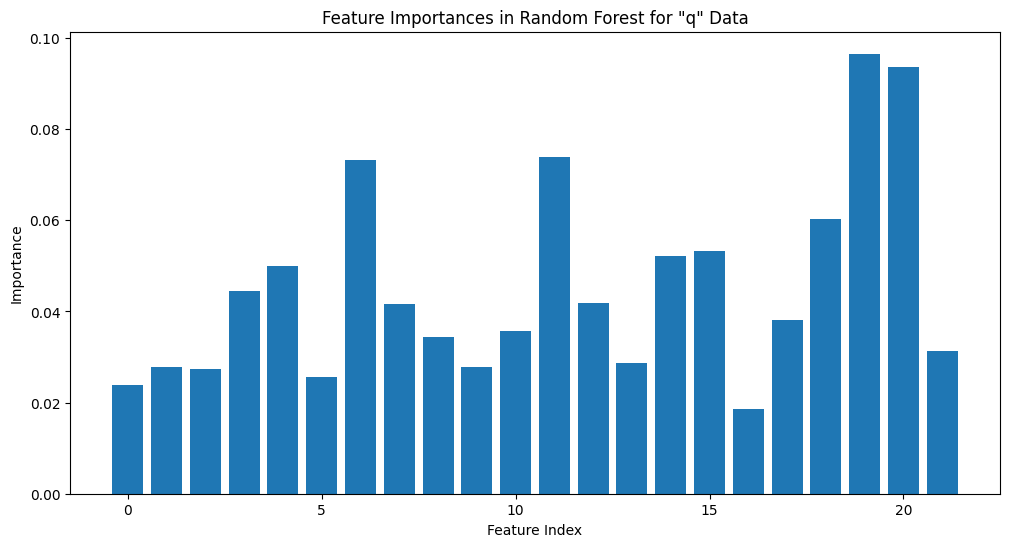

In [36]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest for "q" Data')
plt.show()

# Only P and Q

In [13]:
import pandas
from sklearn.model_selection import train_test_split

path_to_csv = "/mnt/scratchc/fmlab/zuberi01/masters/model_training_input_230815.csv"

# put into a pandas with the first row being column names
df = pandas.read_csv(path_to_csv, header=0)

# only keep the Status column and the columns that end in "q" or "p"
df = df.loc[:, df.columns.str.contains("q") | df.columns.str.contains("p") | df.columns.str.contains("Status")]
# Remove column 'Esophageal location', 'OGD_pathology', 'seq_ID'
df = df.drop(['Esophageal location', 'OGD_pathology', 'seq_ID'], axis=1)

# in the Y column, replace "NP" with 0 and "P" with 1
df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)

# the status column is the Y, the rest are the X
X = df.drop("Status", axis=1)
Y = df["Status"]

# separate into train, val and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

/tmp/ipykernel_36109/50754641.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)


In [14]:
# now train a random forest model and evaluate it

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=41, random_state=0)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)
Y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Train accuracy: {train_accuracy}")
print(f"Val accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# get the AUC as well
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(Y_train, Y_train_pred)
val_auc = roc_auc_score(Y_val, Y_val_pred)
test_auc = roc_auc_score(Y_test, Y_test_pred)

print(f"Train AUC: {train_auc}")
print(f"Val AUC: {val_auc}")
print(f"Test AUC: {test_auc}")

Train accuracy: 1.0
Val accuracy: 0.7520661157024794
Test accuracy: 0.8157894736842105
Train AUC: 1.0
Val AUC: 0.7324929971988796
Test AUC: 0.8125433125433125


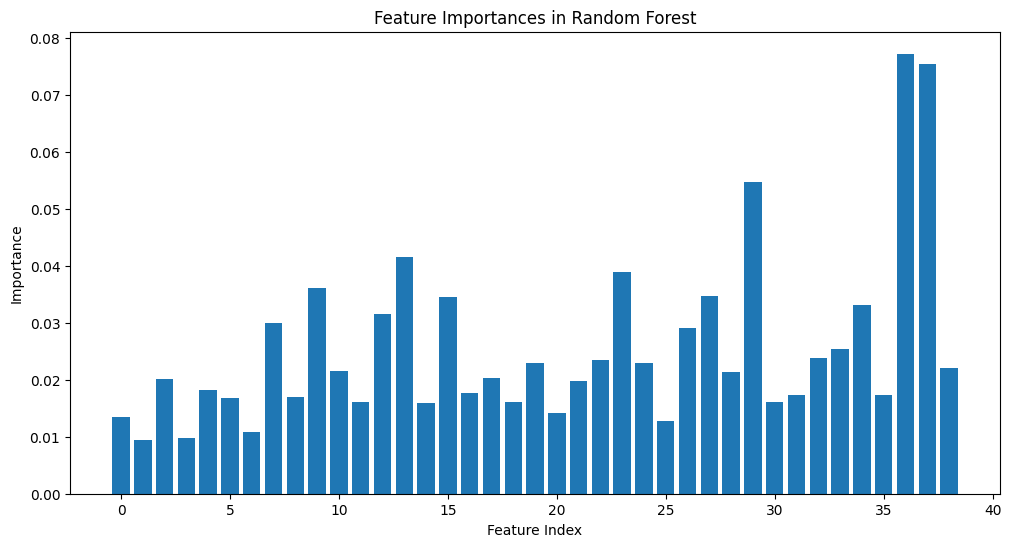

In [39]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()

# CNV, P and Q

In [15]:
import pandas
from sklearn.model_selection import train_test_split

path_to_csv = "/mnt/scratchc/fmlab/zuberi01/masters/model_training_input_230815.csv"

# put into a pandas with the first row being column names
df = pandas.read_csv(path_to_csv, header=0)

# only keep the Status column and the columns that end in "q" or "p" or have ":"
df = df.loc[:, df.columns.str.contains("q") | df.columns.str.contains("p") | df.columns.str.contains(":") | df.columns.str.contains("Status")]
# Remove column 'Esophageal location', 'OGD_pathology', 'seq_ID'
df = df.drop(['Esophageal location', 'OGD_pathology', 'seq_ID'], axis=1)

# in the Y column, replace "NP" with 0 and "P" with 1
df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)

# the status column is the Y, the rest are the X
X = df.drop("Status", axis=1)
Y = df["Status"]

# separate into train, val and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

/tmp/ipykernel_36109/2401934014.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Status"] = df["Status"].replace("NP", 0).replace("P", 1)


In [16]:
# now train a random forest model and evaluate it

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=41, random_state=0)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)
Y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Train accuracy: {train_accuracy}")
print(f"Val accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy}")

# get the AUC as well
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(Y_train, Y_train_pred)
val_auc = roc_auc_score(Y_val, Y_val_pred)
test_auc = roc_auc_score(Y_test, Y_test_pred)

print(f"Train AUC: {train_auc}")
print(f"Val AUC: {val_auc}")
print(f"Test AUC: {test_auc}")

Train accuracy: 1.0
Val accuracy: 0.7933884297520661
Test accuracy: 0.8486842105263158
Train AUC: 1.0
Val AUC: 0.7735294117647059
Test AUC: 0.8463270963270964
